In [10]:
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
from plotnine import *

from plotnine.data import diamonds

In [11]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Figure size 800x600 with 0 Axes>

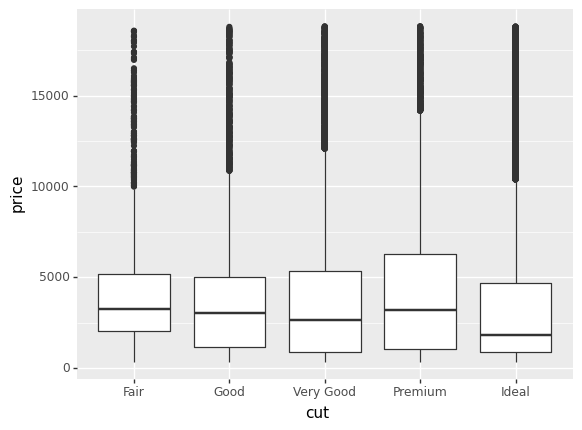

<ggplot: (8766735056240)>

In [12]:
ggplot(data=diamonds) +\
    geom_boxplot(mapping=aes(x='cut', y='price'))
    

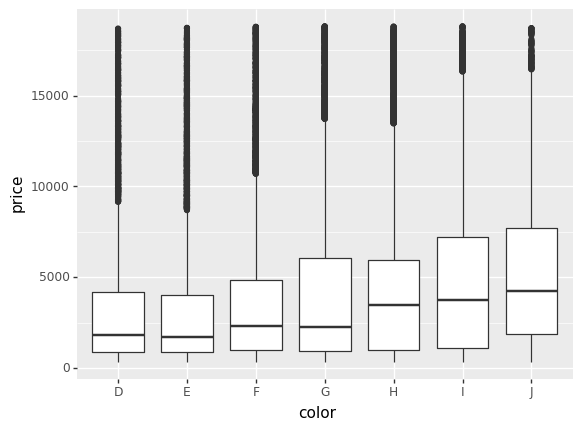

<ggplot: (8766734594660)>

In [19]:
ggplot(data=diamonds) +\
    geom_boxplot(mapping=aes(x='color', y='price'))

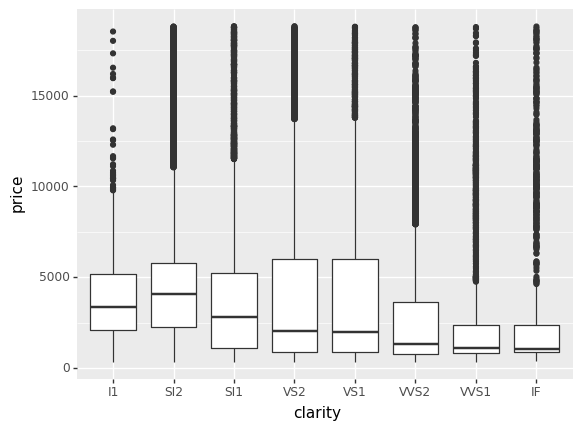

<ggplot: (8766734519703)>

In [20]:
ggplot(data=diamonds) +\
    geom_boxplot(mapping=aes(x='clarity', y='price'))


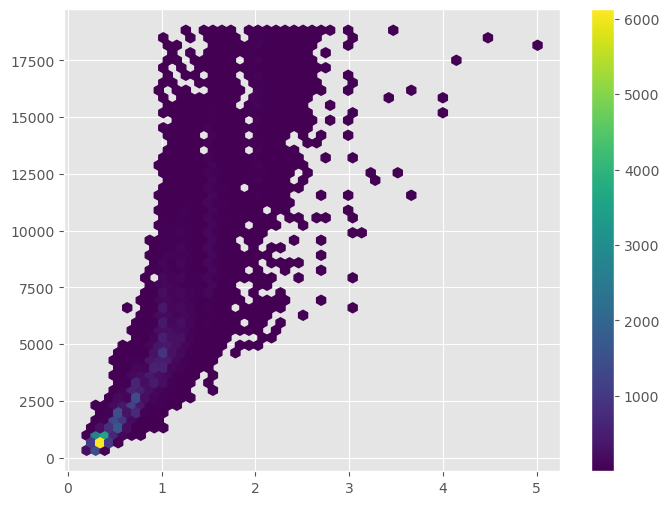

In [30]:
plt.style.use('ggplot')
fig=plt.figure(figsize=(8, 6))
hb = plt.hexbin(diamonds['carat'], y = diamonds['price'], gridsize=50, mincnt=1)
fig.colorbar(hb)
plt.show()

In [34]:
diamonds_log2 = diamonds.query('carat <= 2.5').sort_values(by='carat').copy()
diamonds_log2['price'] = np.log2(diamonds_log2['price'])
diamonds_log2['carat'] = np.log2(diamonds_log2['carat'])
diamonds_log2

,carat,cut,color,clarity,depth,table,price,x,y,z
31600,-2.321928,Premium,D,VS2,62.3,60.0,8.519636,3.73,3.68,2.31
31601,-2.321928,Premium,D,VS2,61.7,60.0,8.519636,3.77,3.72,2.31
31599,-2.321928,Ideal,E,VS2,62.2,57.0,8.519636,3.76,3.73,2.33
31598,-2.321928,Very Good,E,VS2,63.4,59.0,8.519636,3.74,3.71,2.36
31597,-2.321928,Ideal,D,VS2,61.5,57.0,8.519636,3.81,3.77,2.33
...,...,...,...,...,...,...,...,...,...,...
24863,1.321928,Fair,H,SI2,64.9,58.0,13.696750,8.46,8.43,5.48
19921,1.321928,Premium,H,I1,59.9,60.0,13.047635,8.75,8.67,5.22
25440,1.321928,Fair,G,SI2,67.0,57.0,13.792994,8.36,8.29,5.58
26411,1.321928,Premium,H,SI2,62.4,59.0,13.959821,8.61,8.54,5.35


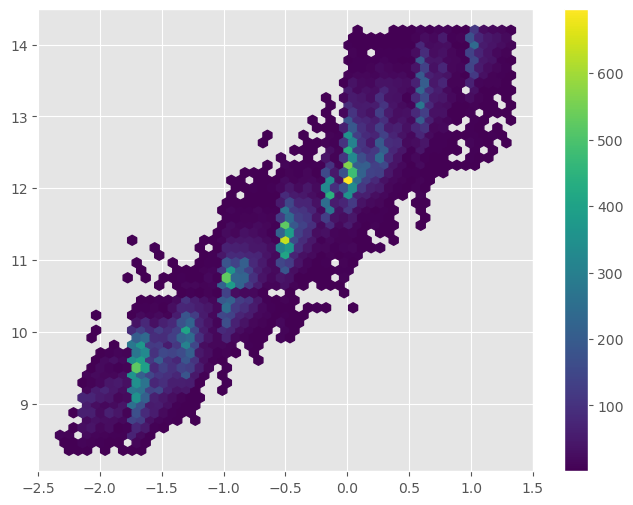

In [40]:
fig = plt.figure(figsize=(8,6))
hp = plt.hexbin(diamonds_log2['carat'], y=diamonds_log2['price'], gridsize=50, mincnt=1)
fig.colorbar(hp)
plt.show()

In [41]:
diamons_mod = smf.ols("price ~ carat", data=diamonds_log2)
diamond_res = diamons_mod.fit()
diamond_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:09:08   Log-Likelihood:                -23824.
No. Observations:               53814   AIC:                         4.765e+04
Df Residuals:                   53812   BIC:                         4.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1939      0.002   6194.469      0.000      12.190      12.198
carat          1.6814      0.002    868.451      0.000       1.678       1.685
==============================================================================
Omnibus:                      777.755   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1345.432
Skew:                           0.104   Prob(JB):                    6.97e-293
Kurtosis:                       3.746   Cond. No.                         1.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
diamonds_mod = smf.ols("np.log2(price) ~ np.log2(carat)", data=diamonds.query('carat <= 2.5'))
diamond_res = diamonds_mod.fit()
diamond_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log2(price)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:15:30   Log-Likelihood:                -23824.
No. Observations:               53814   AIC:                         4.765e+04
Df Residuals:                   53812   BIC:                         4.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.1939      0.002   6194.469      0.000      12.190      12.198
np.log2(carat)     1.6814      0.002    868.451      0.000       1.678       1.685
==============================================================================
Omnibus:                      777.755   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1345.432
Skew:                           0.104   Prob(JB):                    6.97e-293
Kurtosis:                       3.746   Cond. No.                         1.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
diamond_res.fittedvalues

0         8.628862
1         8.408191
2         8.628862
3         9.191144
4         9.352918
           ...    
53935    11.397009
53936    11.397009
53937    11.328675
53938    11.828011
53939    11.496031
Length: 53814, dtype: float64

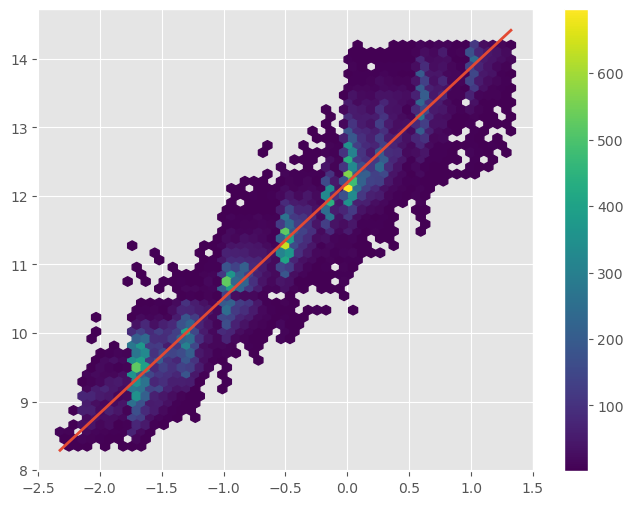

In [73]:
fig = plt.figure(figsize=(8, 6))
hb = plt.hexbin(diamonds_log2['carat'], y = diamonds_log2['price'], gridsize=50, mincnt=1)
fig.colorbar(hb)
x = diamonds_log2['carat']
y = diamond_res.params['Intercept'] + diamond_res.params['np.log2(carat)'] * diamonds_log2['carat']
plt.plot(x, y, linewidth=2)
plt.show()

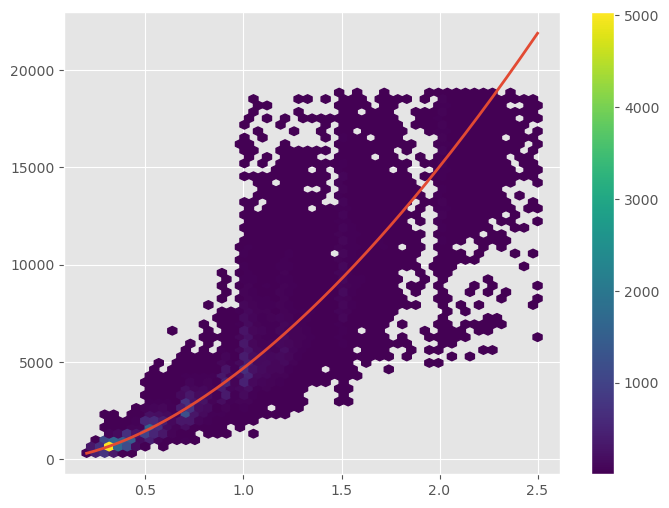

In [89]:
fig = plt.figure(figsize=(8, 6))
x = 2**diamonds_log2['carat']
y = 2**diamonds_log2['price']
hb = plt.hexbin(x=x, y=y, gridsize=50, mincnt=1)
y = 2**(diamond_res.params['Intercept'] + (diamond_res.params['np.log2(carat)'] * diamonds_log2['carat']))
plt.plot(x, y, linewidth=2)
fig.colorbar(hb)
plt.show()

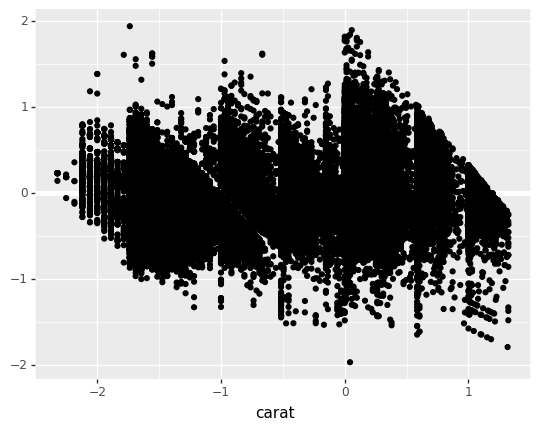

<ggplot: (8766732944309)>

In [92]:
ggplot(data=diamonds_log2) +\
    geom_hline(yintercept=0, color='white', size=2) +\
    geom_point(mapping=aes(x='carat', y=diamond_res.resid))

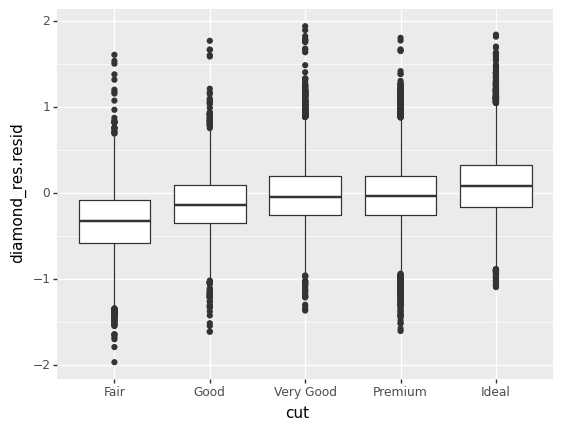

<ggplot: (8766724856938)>

In [93]:
ggplot(data=diamonds_log2) +\
    geom_boxplot(mapping=aes(x='cut', y='diamond_res.resid'))

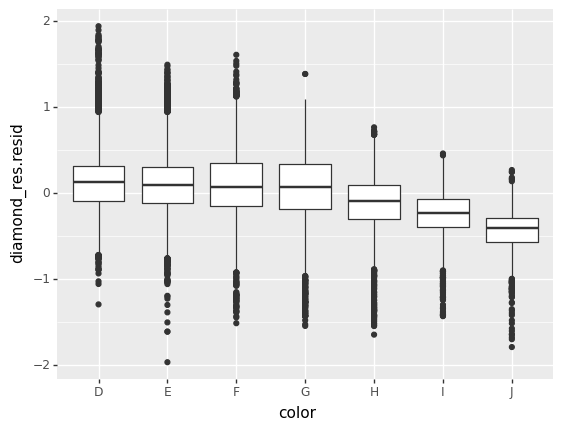

<ggplot: (8766728040979)>

In [94]:
ggplot(data=diamonds_log2) +\
    geom_boxplot(mapping=aes(x='color', y='diamond_res.resid'))

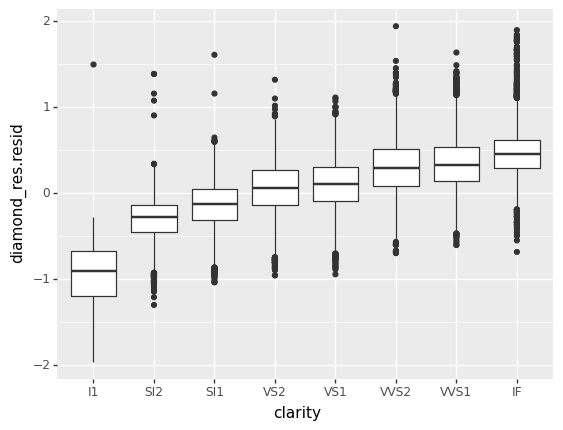

<ggplot: (8766734550977)>

In [95]:
ggplot(data=diamonds_log2) +\
    geom_boxplot(mapping=aes(x='clarity', y='diamond_res.resid'))